In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from collections import Counter
import imblearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from matplotlib import pyplot

Using TensorFlow backend.


In [2]:
raw = pd.read_csv('cgfinal414.csv')

In [3]:
raw = raw.drop(columns='id')

In [4]:
raw['cgphq2'].value_counts()

0.0    322
1.0     75
Name: cgphq2, dtype: int64

In [5]:
raw1 = raw.dropna()

In [6]:
df_cgd=raw1

In [7]:

one_hot = pd.get_dummies(raw1['StudyArm'])
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('StudyArm',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

one_hot = pd.get_dummies(df_cgd['incomecat'],prefix='incomecat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('incomecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)
df_cgd = df_cgd.drop('incomecat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['gradecat'],prefix='gradecat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('gradecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('gradecat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['relationship_cat'],prefix='relationship_cat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('relationship_cat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('relationship_cat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['racecat'],prefix='race_cat')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('racecat',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('race_cat_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['TTC3'],prefix='TTC3')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('TTC3',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('TTC3_3.0',axis = 1)
one_hot = pd.get_dummies(df_cgd['GI_Lung'],prefix='GI_Lung')
# Drop column B as it is now encoded
df_cgd = df_cgd.drop('GI_Lung',axis = 1)
# Join the encoded df
df_cgd = df_cgd.join(one_hot)

df_cgd = df_cgd.drop('GI_Lung_3.0',axis = 1)

In [8]:
raw1=df_cgd

In [9]:
raw1.columns.values

array(['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom', 'cgdistress',
       'cggad7', 'cgphq2', 'SF12total', 'AGG_PHYS', 'AGG_MENT', 'Control',
       'GA', 'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0',
       'gradecat_2.0', 'relationship_cat_1.0', 'relationship_cat_2.0',
       'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0',
       'GI_Lung_1.0', 'GI_Lung_2.0'], dtype=object)

In [10]:
raw1['cgphq2'].describe()

count    380.000000
mean       0.186842
std        0.390299
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: cgphq2, dtype: float64

In [11]:
raw1['cgphq2'].value_counts()

0.0    309
1.0     71
Name: cgphq2, dtype: int64

In [12]:
X = raw1[['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom',  'Control',
       'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0',
       'gradecat_2.0', 'relationship_cat_1.0', 'relationship_cat_2.0',
       'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0',
       'GI_Lung_1.0', 'GI_Lung_2.0']]
y = raw1['cgphq2']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

In [15]:
X_train.shape
print(sorted(Counter(y_train).items()))

print(sorted(Counter(y_test).items()))

[(0.0, 232), (1.0, 53)]
[(0.0, 77), (1.0, 18)]


In [16]:
X_train.shape
print(sorted(Counter(y_train).items()))

print(sorted(Counter(y_test).items()))

[(0.0, 232), (1.0, 53)]
[(0.0, 77), (1.0, 18)]


In [17]:
X_test.shape

(95, 31)

In [18]:
y_test.shape

(95,)

In [19]:
X_test

,Age,Gender,Living,TTC5,TTC6a,TTC6b,TTC6c,TTC6d,distress,ImpairedPolypharmacy,...,gradecat_1.0,gradecat_2.0,relationship_cat_1.0,relationship_cat_2.0,race_cat_1.0,race_cat_2.0,TTC3_1.0,TTC3_2.0,GI_Lung_1.0,GI_Lung_2.0
59,79.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0,0,...,0,1,1,0,1,0,0,1,0,0
213,76.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,...,0,1,1,0,1,0,0,1,0,1
29,78.0,1.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,0,1,0,1,0,1,0,0,0
144,66.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1,...,0,0,1,0,1,0,0,1,0,1
373,64.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,1,...,0,1,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
370,58.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1,...,0,0,1,0,0,1,0,1,0,0
30,72.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0,1,...,1,0,1,0,1,0,0,1,0,1
111,63.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1,...,0,1,0,1,1,0,0,1,0,1
130,74.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1,...,0,1,1,0,1,0,0,1,0,0


Text(0.5, 1.0, 'Class Distributions \n (0: Negative || 1: Positive)')

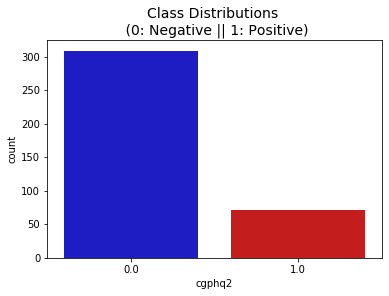

In [20]:
import seaborn as sns
colors = ["#0101DF","#DF0101"]

sns.countplot('cgphq2', data=raw1, palette=colors)
plt.title('Class Distributions \n (0: Negative || 1: Positive)', fontsize=14)

In [21]:
y.shape

(380,)

In [22]:
print(sorted(Counter(y).items()))

[(0.0, 309), (1.0, 71)]


In [23]:
raw2=X
raw2['cgphq2']=y

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
from collections import Counter

In [25]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SVMSMOTE

from imblearn.over_sampling import KMeansSMOTE
over = SVMSMOTE(random_state=0)

T-SNE took 0.92 s
PCA took 0.003 s
Truncated SVD took 0.003 s


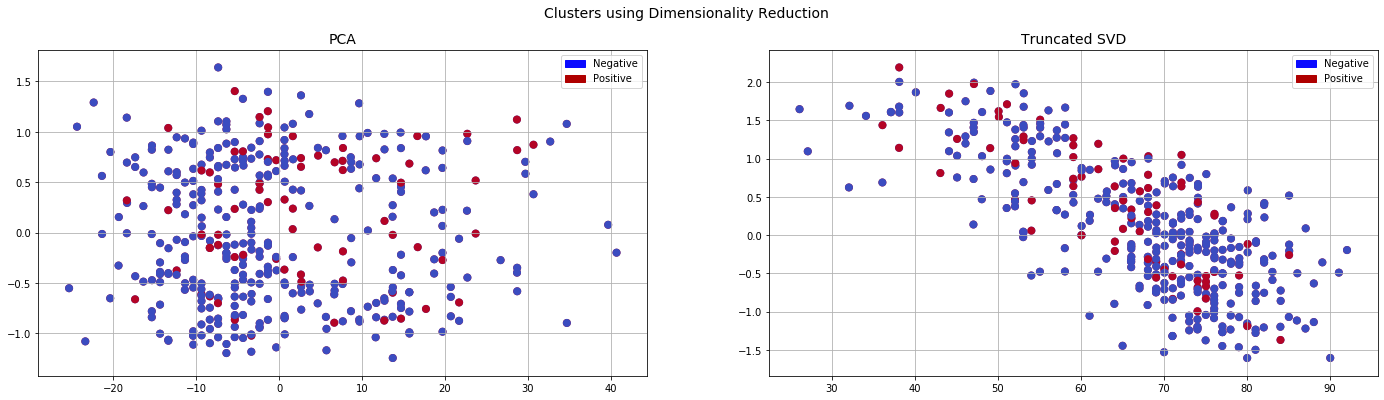

In [26]:
import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
# New_df is from the random undersample data (fewer instances)
X = raw2.drop('cgphq2', axis=1)
y = raw2['cgphq2']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

import matplotlib.patches as mpatches
f, (ax2, ax3) = plt.subplots(1, 2, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Negative')
red_patch = mpatches.Patch(color='#AF0000', label='Positive')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Neg', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Pos', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Neg', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Pos', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [27]:
# X_train1,y_train1 = over.fit_sample(X,y)
X_train1,y_train1 = over.fit_resample(X, y)
print(sorted(Counter(y_train1).items()))

[(0.0, 309), (1.0, 213)]


In [28]:

# from imblearn.combine import SMOTETomek
# # smote_tomek = SMOTETomek(random_state=0)

# X_train3,y_train3= smote_tomek.fit_resample(X,y)

# print(sorted(Counter(y_train3).items()))

In [29]:
X.shape

(380, 31)

In [30]:
new_df=X_train1
new_df['cgphq2']=y_train1


In [31]:
import time

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
# New_df is from the random undersample data (fewer instances)
X = new_df.drop('cgphq2', axis=1)
y = new_df['cgphq2']
# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))

T-SNE took 1.2 s
PCA took 0.003 s
Truncated SVD took 0.002 s


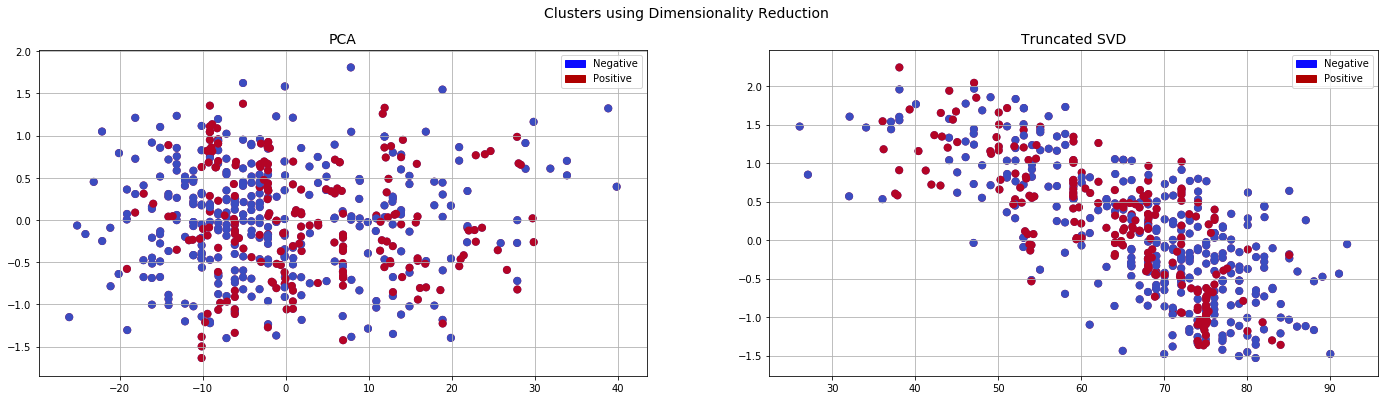

In [32]:

import matplotlib.patches as mpatches
f, (ax2, ax3) = plt.subplots(1, 2, figsize=(24,6))
# labels = ['No Fraud', 'Fraud']
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Negative')
red_patch = mpatches.Patch(color='#AF0000', label='Positive')


# # t-SNE scatter plot
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
# ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
# ax1.set_title('t-SNE', fontsize=14)

# ax1.grid(True)

# ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Negative', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Positive', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Negative', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='Positive', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])

plt.show()

In [33]:
# from numpy import mean
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.tree import DecisionTreeClassifier

# # define model
# model1 = DecisionTreeClassifier()
# # evaluate pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# scores = cross_val_score(model1, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
# print('Mean ROC AUC: %.3f' % mean(scores))
X = raw1[['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'distress', 'ImpairedPolypharmacy', 'cognition',
       'nutrition', 'phy_performance', 'function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'calcimpairedCom',  'Control',
       'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0',
       'gradecat_2.0', 'relationship_cat_1.0', 'relationship_cat_2.0',
       'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0',
       'GI_Lung_1.0', 'GI_Lung_2.0']]
y = raw1['cgphq2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)#####42

# SVM

In [34]:
C = []
for i in range(25,101):
    C.append(i)


c = []
for j in np.arange(0.1, 1.1, 0.1):
    c.append(j)

for k in np.arange(0.01, 0.1, 0.01):
    c.append(k)   
    

for i in np.arange(0.001, 0.01, 0.001):
    c.append(i)

    
print(c)

[0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6, 0.7000000000000001, 0.8, 0.9, 1.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.060000000000000005, 0.06999999999999999, 0.08, 0.09, 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009000000000000001]


In [35]:
c=[]
for i in range(-12,12):
    c.append(2**i)
gamma=[]
for j in range(-12,12):
    gamma.append(2**j)
print(c)

[0.000244140625, 0.00048828125, 0.0009765625, 0.001953125, 0.00390625, 0.0078125, 0.015625, 0.03125, 0.0625, 0.125, 0.25, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048]


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)#####42
from sklearn.svm import SVC
modelsvmf1 = Pipeline([
        ('svm',  SVC(random_state=42,probability=True,class_weight = {0:1,1:(309/71)}))
    ])


# modelsvm = SVC(random_state=42, verbose=2,kernel='rbf')

from sklearn.model_selection import GridSearchCV



param_gridsvmf1 = {'svm__C': c, 

              'svm__gamma': gamma}  
  


svmgridsearchf1 = GridSearchCV(estimator=modelsvmf1, param_grid=param_gridsvmf1, n_jobs=-1, 
                             cv=5, verbose=5, return_train_score=True,scoring="f1")


svmgridsearchf1.fit(X_train, y_train)
svmgridsearchf1.best_score_
svmgridsearchf1.best_params_

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done 585 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done 1845 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:   14.4s finished


{'svm__C': 16, 'svm__gamma': 0.00048828125}

In [37]:
svmgridsearchf1.best_score_

0.370547276478311

In [38]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
rfsmotey = svmgridsearchf1.predict(X_test)
CM = confusion_matrix(y_test, rfsmotey)
print(CM)

[[39 38]
 [ 4 14]]


In [39]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve

def get_best_threshold(testy,yhat):
    fpr, tpr, thresholds = roc_curve(testy, yhat)
    # get the best threshold
    J = tpr - fpr
    ix = np.argmax(J)
    best_thresh = thresholds[ix]
    print('Best Threshold=%f' % (best_thresh))
    return best_thresh



rfrr= svmgridsearchf1.predict_proba(X_test)
rfrr_thres=get_best_threshold(y_test,rfrr[:,1])
rfrr=(rfrr[:,1]>=rfrr_thres).astype(int)
rfrr_cm = confusion_matrix(y_test,rfrr)
print(rfrr_cm)

Best Threshold=0.180018
[[34 43]
 [ 2 16]]


In [40]:
from sklearn.metrics import confusion_matrix
lgrres = svmgridsearchf1.predict_proba(X_test)
lgrres=(lgrres[:,1]>=0.215).astype(int)
CMlgr = confusion_matrix(y_test, lgrres)
print(CMlgr)

[[47 30]
 [ 7 11]]


# Using Lime to show case how to interpret results (SVM example）

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)#####42
from sklearn.svm import SVC
modelsvmf1 = Pipeline([
        ('svm',  SVC(random_state=42,probability=True,class_weight = {0:1,1:3.937}))
    ])


# modelsvm = SVC(random_state=42, verbose=2,kernel='rbf')

from sklearn.model_selection import GridSearchCV



param_gridsvmf1 = {'svm__C': c, 

              'svm__gamma': gamma}  
  


svmgridsearchf1 = GridSearchCV(estimator=modelsvmf1, param_grid=param_gridsvmf1, n_jobs=-1, 
                             cv=5, verbose=5, return_train_score=True,scoring="f1")


svmgridsearchf1.fit(X_train, y_train)
svmgridsearchf1.best_score_
svmgridsearchf1.best_params_

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 5 folds for each of 576 candidates, totalling 2880 fits


[Parallel(n_jobs=-1)]: Done 312 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 1392 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 2880 out of 2880 | elapsed:    9.5s finished


{'svm__C': 16, 'svm__gamma': 0.000244140625}

In [42]:
svmgridsearchf1.best_score_

0.3638675541901349

In [43]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
rfsmotey = svmgridsearchf1.predict(X_test)
CM = confusion_matrix(y_test, rfsmotey)
print(CM)

[[50 27]
 [ 4 14]]


In [44]:
X_test.iloc[5]

Age                     71.0
Gender                   0.0
Living                   2.0
TTC5                     0.0
TTC6a                    0.0
TTC6b                    1.0
TTC6c                    0.0
TTC6d                    0.0
distress                 0.0
ImpairedPolypharmacy     1.0
cognition                0.0
nutrition                0.0
phy_performance          0.0
function                 0.0
ImpairedCom              1.0
psychological            0.0
ImpairedMS               0.0
calcimpairedCom          1.0
Control                  0.0
incomecat_1.0            1.0
incomecat_2.0            0.0
gradecat_1.0             0.0
gradecat_2.0             1.0
relationship_cat_1.0     1.0
relationship_cat_2.0     0.0
race_cat_1.0             1.0
race_cat_2.0             0.0
TTC3_1.0                 0.0
TTC3_2.0                 1.0
GI_Lung_1.0              0.0
GI_Lung_2.0              0.0
Name: 257, dtype: float64

In [45]:
y_test.iloc[5]

1.0

In [46]:
for i in range(X_test.shape[0]):
    print(str(svmgridsearchf1.predict(X_test.iloc[i].values.reshape(1, -1)))+" vs "+str(y_test.iloc[i])+"index"+str(i))

[0.] vs 0.0index0
[0.] vs 0.0index1
[0.] vs 0.0index2
[1.] vs 0.0index3
[1.] vs 1.0index4
[0.] vs 1.0index5
[0.] vs 0.0index6
[1.] vs 1.0index7
[1.] vs 0.0index8
[0.] vs 0.0index9
[0.] vs 0.0index10
[1.] vs 0.0index11
[0.] vs 0.0index12
[0.] vs 0.0index13
[1.] vs 0.0index14
[1.] vs 1.0index15
[1.] vs 0.0index16
[0.] vs 0.0index17
[1.] vs 1.0index18
[0.] vs 0.0index19
[1.] vs 1.0index20
[1.] vs 0.0index21
[1.] vs 1.0index22
[1.] vs 0.0index23
[1.] vs 0.0index24
[0.] vs 0.0index25
[0.] vs 0.0index26
[0.] vs 0.0index27
[1.] vs 0.0index28
[0.] vs 0.0index29
[0.] vs 0.0index30
[0.] vs 0.0index31
[0.] vs 0.0index32
[1.] vs 0.0index33
[1.] vs 1.0index34
[0.] vs 0.0index35
[1.] vs 0.0index36
[0.] vs 0.0index37
[0.] vs 0.0index38
[1.] vs 0.0index39
[0.] vs 0.0index40
[0.] vs 0.0index41
[0.] vs 0.0index42
[0.] vs 0.0index43
[1.] vs 1.0index44
[1.] vs 1.0index45
[0.] vs 0.0index46
[0.] vs 1.0index47
[1.] vs 0.0index48
[1.] vs 1.0index49
[1.] vs 1.0index50
[0.] vs 0.0index51
[1.] vs 0.0index52
[1.

No Skill: ROC AUC=0.500
svm: ROC AUC=0.707


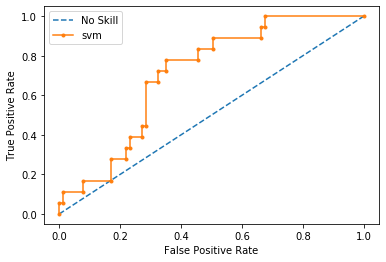

In [49]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# generate 2 class dataset
ns_probs = [0 for _ in range(len(y_test))]
lr_probssvm = svmgridsearchf1.predict_proba(X_test)

# keep probabilities for the positive outcome only
lr_probssvm = lr_probssvm[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
svm_auc = roc_auc_score(y_test, lr_probssvm)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))

print('svm: ROC AUC=%.3f' % (svm_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, lr_probssvm)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(svm_fpr, svm_tpr, marker='.', label='svm')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [50]:
from __future__ import print_function
import sklearn
import sklearn.datasets
import sklearn.ensemble

import numpy as np
import lime
import lime.lime_tabular

In [51]:
from __future__ import print_function
import ipywidgets as widgets  
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [52]:
svmgridsearchf1.predict(X_test.iloc[i].values.reshape(1, -1))==1

array([ True])

In [53]:
def actualy(i):
    if y_test.iloc[i]==1:
        return "depressed"
    else:
        return "healthy"

In [54]:
l1=['Age', 'Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'Patient Distress', 'ImpairedPolypharmacy', 'cognition',
       'Impaired Nutrition', 'phy_performance', 'Impaired Function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'CG comorbidity',  'Control',
       'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0',
       'gradecat_2.0', 'relationship_cat_1.0', 'relationship_cat_2.0',
       'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0',
       'GI_Lung_1.0', 'GI_Lung_2.0']
l2=['Gender', 'Living', 'TTC5', 'TTC6a', 'TTC6b', 'TTC6c',
       'TTC6d', 'Patient Distress', 'ImpairedPolypharmacy', 'cognition',
       'Impaired Nutrition', 'phy_performance', 'Impaired Function', 'ImpairedCom',
       'psychological', 'ImpairedMS', 'CG comorbidity',  'Control',
       'incomecat_1.0', 'incomecat_2.0', 'gradecat_1.0',
       'gradecat_2.0', 'relationship_cat_1.0', 'relationship_cat_2.0',
       'race_cat_1.0', 'race_cat_2.0', 'TTC3_1.0', 'TTC3_2.0',
       'GI_Lung_1.0', 'GI_Lung_2.0']

In [55]:
pd.set_option('display.max_columns',50)

In [56]:
X_train.values.shape

(285, 31)

In [57]:
a=X_test.iloc[i].values.reshape(1, -1)

In [58]:
a.shape

(1, 31)

In [59]:
svmgridsearchf1.best_estimator_.predict_proba(a)

array([[0.71396556, 0.28603444]])

In [60]:
X_train.describe()

,Age,Gender,Living,TTC5,TTC6a,TTC6b,TTC6c,TTC6d,distress,ImpairedPolypharmacy,cognition,nutrition,phy_performance,function,ImpairedCom,psychological,ImpairedMS,calcimpairedCom,Control,incomecat_1.0,incomecat_2.0,gradecat_1.0,gradecat_2.0,relationship_cat_1.0,relationship_cat_2.0,race_cat_1.0,race_cat_2.0,TTC3_1.0,TTC3_2.0,GI_Lung_1.0,GI_Lung_2.0
count,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000,285.000000
mean,66.536842,0.266667,1.536842,0.698246,0.217544,0.157895,0.189474,0.108772,0.340351,0.835088,0.322807,0.596491,0.943860,0.596491,0.614035,0.259649,0.228070,0.382456,0.470175,0.368421,0.452632,0.077193,0.284211,0.670175,0.217544,0.901754,0.056140,0.073684,0.894737,0.235088,0.256140
std,12.807192,0.442995,0.520235,0.459827,0.413301,0.365284,0.392574,0.311901,0.474661,0.371754,0.468372,0.491464,0.230597,0.491464,0.487679,0.439213,0.420326,0.486842,0.499988,0.483225,0.498627,0.267367,0.451831,0.470976,0.413301,0.298170,0.230597,0.261716,0.307432,0.424800,0.437268
min,26.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,70.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,75.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,92.000000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Interactive Visualization by LIME, Rownum indicates which test set sample you wanna test on

In [77]:

def predictor(rownum):
    i=int(rownum)
    if(svmgridsearchf1.predict(X_test.iloc[i].values.reshape(1, -1))==1):
        print("prediction result: depressed | actual result: "+actualy(i))
    else:
        print("prediction result: healthy| actual result: "+actualy(i))
    explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values, feature_names=l1,class_names=np.array(['healthy','depressed']))
    ss=svmgridsearchf1.best_estimator_
    

    
    a=X_test.iloc[i].values
    exp = explainer.explain_instance(a, ss.predict_proba, num_features=10, top_labels=0)
    exp.show_in_notebook(predict_proba=False,show_table=True, show_all=False)
    exp.as_pyplot_figure()
    from matplotlib import pyplot as plt
    plt.tight_layout()
    %matplotlib inline
    fig = exp.as_pyplot_figure()
    
interact_manual(predictor,rownum=widgets.Text("test instance number"));

input_example="5"

interactive(children=(Text(value='test instance number', description='rownum'), Button(description='Run Intera…